In [153]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import geopy.distance as gd

from node2vec import Node2Vec
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, SpectralClustering
from shapely.geometry import Point, Polygon

In [44]:
!pip3 install geopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 696.7 kB/s eta 0:00:00a 0:00:01


In [30]:
df = pd.read_csv("teams.csv")

In [31]:
print(df.style.to_latex())

\begin{tabular}{lllllrr}
 & team_name & city_name & conference & division & arena_lat & arena_long \\
0 & Boston Celtics & Boston, MA & eastern & atlantic & -71.062228 & 42.366303 \\
1 & Brooklyn Nets & New York City, NY & eastern & atlantic & -73.974689 & 40.682650 \\
2 & New York Knicks & New York City, NY & eastern & atlantic & -73.993611 & 40.750556 \\
3 & Philadelphia 76ers & Philadelphia, PA & eastern & atlantic & -75.171944 & 39.901111 \\
4 & Toronto Raptors & Toronto, Ontario & eastern & atlantic & -79.379167 & 43.643333 \\
5 & Chicago Bulls & Chicago, IL & eastern & central & -87.674167 & 41.880556 \\
6 & Cleveland Cavaliers & Cleveland, OH & eastern & central & -81.688056 & 41.496389 \\
7 & Detroit Pistons & Detroit, MI & eastern & central & -83.245556 & 42.696944 \\
8 & Indiana Pacers & Indianapolis, IN & eastern & central & -86.155556 & 39.763889 \\
9 & Milwaukee Bucks & Milwaukee, WI & eastern & central & -87.916944 & 43.043611 \\
10 & Atlanta Hawks & Atlanta, GA & eastern

In [32]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.arena_lat, df.arena_long), crs="EPSG:4326")

In [33]:
gdf

,team_name,city_name,conference,division,arena_lat,arena_long,geometry
0,Boston Celtics,"Boston, MA",eastern,atlantic,-71.062228,42.366303,POINT (-71.06223 42.36630)
1,Brooklyn Nets,"New York City, NY",eastern,atlantic,-73.974689,40.682650,POINT (-73.97469 40.68265)
2,New York Knicks,"New York City, NY",eastern,atlantic,-73.993611,40.750556,POINT (-73.99361 40.75056)
3,Philadelphia 76ers,"Philadelphia, PA",eastern,atlantic,-75.171944,39.901111,POINT (-75.17194 39.90111)
4,Toronto Raptors,"Toronto, Ontario",eastern,atlantic,-79.379167,43.643333,POINT (-79.37917 43.64333)
5,Chicago Bulls,"Chicago, IL",eastern,central,-87.674167,41.880556,POINT (-87.67417 41.88056)
6,Cleveland Cavaliers,"Cleveland, OH",eastern,central,-81.688056,41.496389,POINT (-81.68806 41.49639)
7,Detroit Pistons,"Detroit, MI",eastern,central,-83.245556,42.696944,POINT (-83.24556 42.69694)
8,Indiana Pacers,"Indianapolis, IN",eastern,central,-86.155556,39.763889,POINT (-86.15556 39.76389)
9,Milwaukee Bucks,"Milwaukee, WI",eastern,central,-87.916944,43.043611,POINT (-87.91694 43.04361)


In [34]:
print(gdf.style.to_latex())

\begin{tabular}{lllllrrl}
 & team_name & city_name & conference & division & arena_lat & arena_long & geometry \\
0 & Boston Celtics & Boston, MA & eastern & atlantic & -71.062228 & 42.366303 & POINT (-71.062228 42.366303) \\
1 & Brooklyn Nets & New York City, NY & eastern & atlantic & -73.974689 & 40.682650 & POINT (-73.974689 40.68265) \\
2 & New York Knicks & New York City, NY & eastern & atlantic & -73.993611 & 40.750556 & POINT (-73.993611 40.750556) \\
3 & Philadelphia 76ers & Philadelphia, PA & eastern & atlantic & -75.171944 & 39.901111 & POINT (-75.171944 39.901111) \\
4 & Toronto Raptors & Toronto, Ontario & eastern & atlantic & -79.379167 & 43.643333 & POINT (-79.379167 43.643333) \\
5 & Chicago Bulls & Chicago, IL & eastern & central & -87.674167 & 41.880556 & POINT (-87.674167 41.880556) \\
6 & Cleveland Cavaliers & Cleveland, OH & eastern & central & -81.688056 & 41.496389 & POINT (-81.688056 41.496389) \\
7 & Detroit Pistons & Detroit, MI & eastern & central & -83.245556

In [98]:
usa = gpd.read_file("data/usa-states-census-2014.shp")
print(usa.crs)

epsg:4326


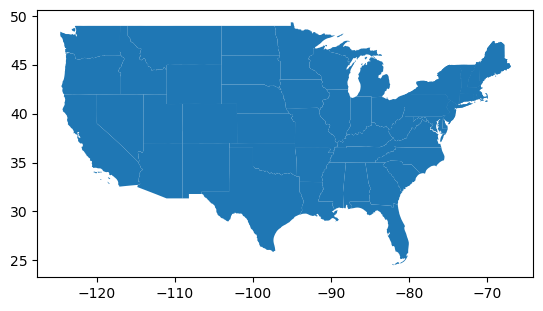

In [97]:
m = usa.plot()
#gdf.explore(m=m, color="red")

In [217]:
# Creating an adjacency matrix with the number of games as weights 

A_num_games_as_weights = np.zeros((30,30))
for i in range(len(gdf["team_name"])):
    for j in range(len(gdf["team_name"])):
        if i == j:
            A_num_games_as_weights[i][j] = 0
        elif gdf.iloc[i]["division"] == gdf.iloc[j]["division"]:
            A_num_games_as_weights[i][j] = 2
        else:
            A_num_games_as_weights[i][j] = 1
            
#print(A_num_games_as_weights)

In [88]:
# Creating an adjacency matrix with the distances as the crow flies as weights 

A_dist_as_weights = np.zeros((30,30))
for i in range(len(gdf["team_name"])):
    for j in range(len(gdf["team_name"])):
        #print(gpd.geodesic((gdf.iloc[i]["arena_long"],gdf.iloc[i]["arena_lat"]), (gdf.iloc[j]["arena_long"],gdf.iloc[j]["arena_lat"])).miles)
        if i == j:
            A_dist_as_weights[i][j] = 0
        else:
            A_dist_as_weights[i][j] = np.round(gd.geodesic((gdf.iloc[i]["arena_long"],gdf.iloc[i]["arena_lat"]), (gdf.iloc[j]["arena_long"],gdf.iloc[j]["arena_lat"])).miles)            
#print(A_dist_as_weights)

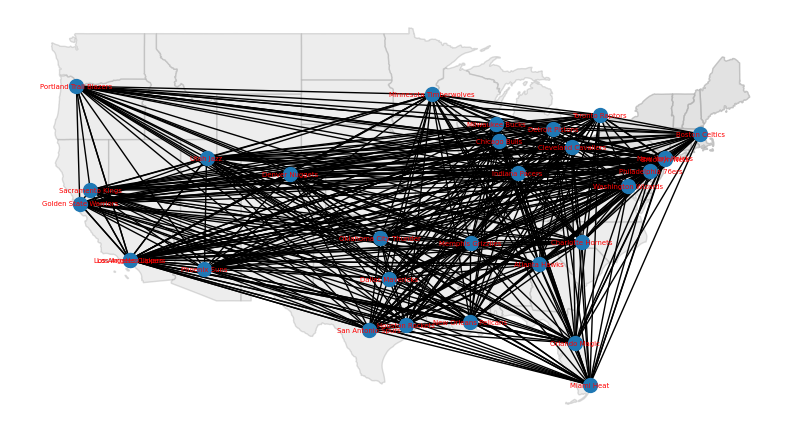

In [100]:
# Visualizing the adjacency matrix with the distances 

G_dist = nx.from_numpy_matrix(A_dist_as_weights)
G_dist = nx.relabel_nodes(G_dist, {k:v for k,v in zip(range(30), gdf["team_name"])})
xy = [list(i) for i in zip(gdf['geometry'].x, gdf['geometry'].y)]
coord = dict(zip(gdf['team_name'], xy))
pos=coord
#nx.draw_networkx(G_dist,pos)
labels = nx.get_edge_attributes(G_dist,'weight')
#nx.draw_networkx_edge_labels(G_dist,pos,edge_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
    
usa.plot(ax=ax, alpha=0.4, edgecolor='darkgrey', color='lightgrey', zorder=1)

nx.draw(G_dist, pos=pos, with_labels=True, font_color='red', node_size=100, arrowsize=2, font_size=5)
#l = nx.draw_networkx_edge_labels(G_dist, pos, edge_labels=labels, font_color='blue', font_size=5)

In [141]:
n2v = Node2Vec(G_dist, dimensions=6, walk_length=50, num_walks=300, workers=4) 

Generating walks (CPU: 1): 100%|██████████| 75/75 [00:03<00:00, 22.90it/s]


In [142]:
model = n2v.fit(window=5, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)

In [143]:
n_ids = model.wv.index_to_key 
n2v_embeddings = model.wv.vectors
#print(n_ids)
n_dict = {k:v for k,v in zip(n_ids, n2v_embeddings)}

#print(nx.get_node_attributes(G, 'osmid'))

n_df = pd.DataFrame([model.wv.get_vector(str(n)) for n in G_dist.nodes()], index = G_dist.nodes)
#print(n_df)

/Users/tiffanychen/opt/anaconda3/envs/ox/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/tiffanychen/opt/anaconda3/envs/ox/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


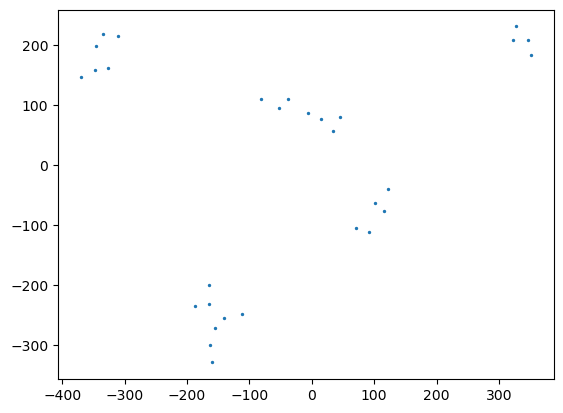

In [186]:
tsne = TSNE(n_components=2, perplexity=3)
n2v_embeddings_2d = tsne.fit_transform(n2v_embeddings)

plt.scatter(n2v_embeddings_2d[:,0], n2v_embeddings_2d[:,1], s=2)

In [163]:
kmeans = KMeans(n_clusters=6)
k_cluster = kmeans.fit_predict(n_df)

spec = SpectralClustering(n_clusters=2)
s_cluster = spec.fit(n_df).labels_

temp_dict = {n_ids[i]: j for i, j in enumerate(k_cluster)}
temp_dict2 = {n_ids[i]: j for i, j in enumerate(s_cluster)}

nx.set_node_attributes(G_dist, temp_dict, "k_cluster")
colors = [k_cluster[i] for i in range(len(G_dist.nodes()))]
nx.set_node_attributes(G_dist, temp_dict2, "s_cluster")
colors2 = [s_cluster[i] for i in range(len(G_dist.nodes()))]

In [164]:
print(colors2)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]


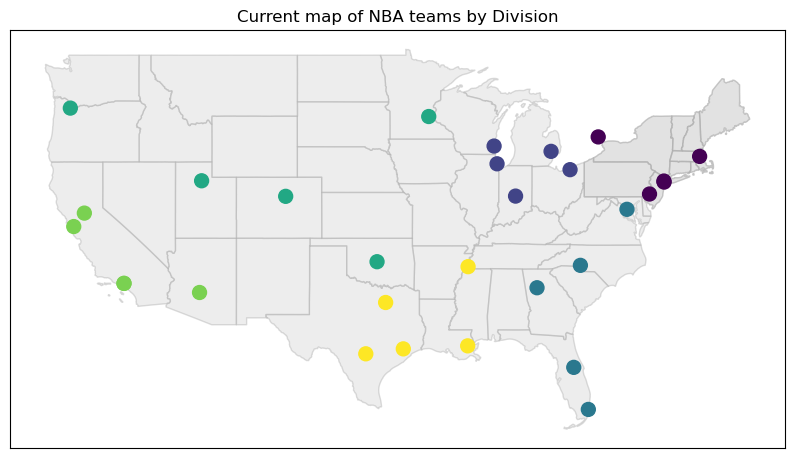

In [183]:
colors3 = []
c = 0
for i in range(30):
    if i%5 == 0:
        c += 1
    colors3.append(c)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.set_title('Current map of NBA teams by Division')

usa.plot(ax=ax, alpha=0.4, edgecolor='darkgrey', color='lightgrey', zorder=1)

nx.draw_networkx_nodes(G_dist, pos=pos, node_size=100, node_color=colors3)

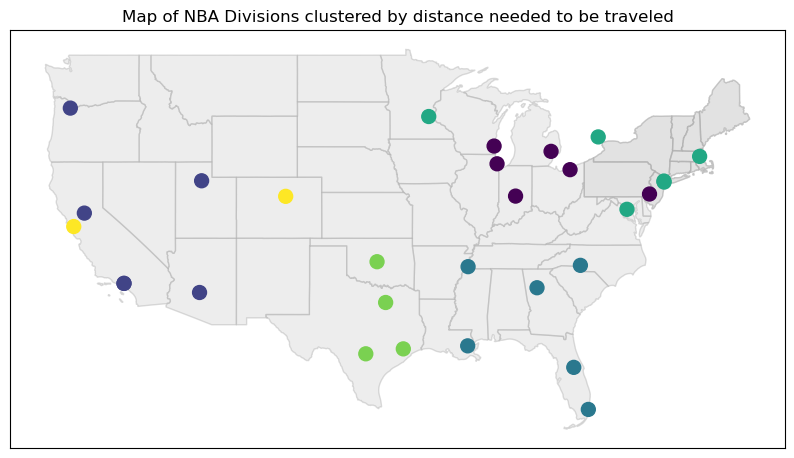

In [188]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.set_title('Map of NBA Divisions clustered by distance needed to be traveled')

usa.plot(ax=ax, alpha=0.4, edgecolor='darkgrey', color='lightgrey', zorder=1)

nx.draw_networkx_nodes(G_dist, pos=pos, node_size=100, node_color=colors)

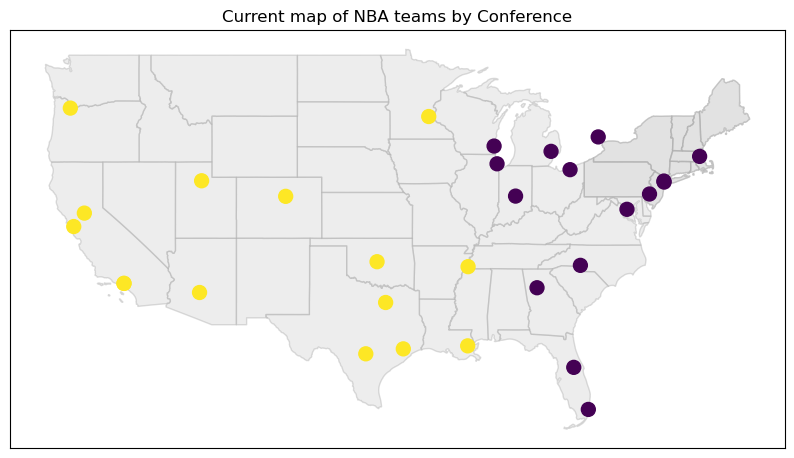

In [187]:
colors4 = []
c = 0
for i in range(30):
    if i%15 == 0:
        c += 1
    colors4.append(c)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.set_title('Current map of NBA teams by Conference')

usa.plot(ax=ax, alpha=0.4, edgecolor='darkgrey', color='lightgrey', zorder=1)

nx.draw_networkx_nodes(G_dist, pos=pos, node_size=100, node_color=colors4)

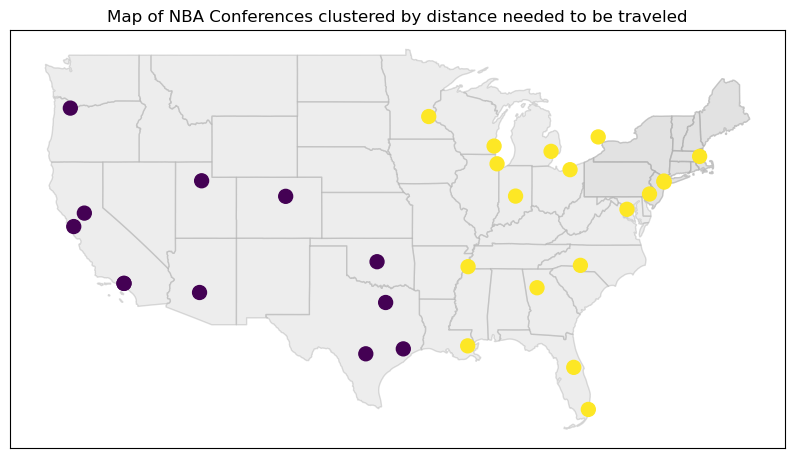

In [189]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.set_title('Map of NBA Conferences clustered by distance needed to be traveled')

usa.plot(ax=ax, alpha=0.4, edgecolor='darkgrey', color='lightgrey', zorder=1)

nx.draw_networkx_nodes(G_dist, pos=pos, node_size=100, node_color=colors2)

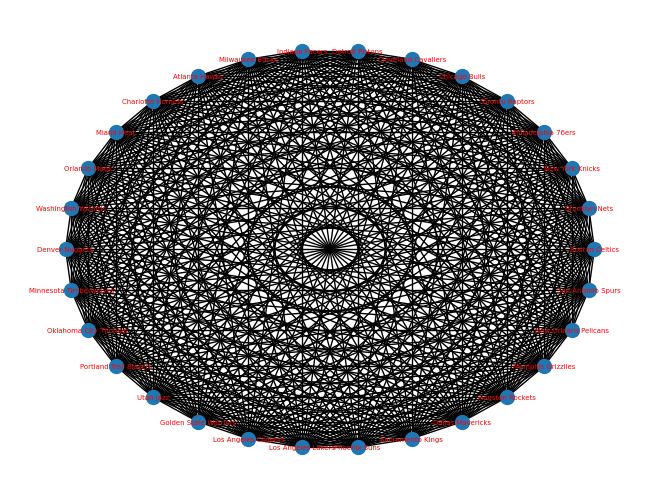

In [208]:
G_games = nx.DiGraph()
G_games = nx.from_numpy_matrix(A_num_games_as_weights)
G_games = nx.relabel_nodes(G_games, {k:v for k,v in zip(range(30), gdf["team_name"])})

pos = nx.circular_layout(G_games)
nx.draw(G_games, pos=pos, with_labels=True, font_color='red', node_size=100, arrowsize=5, font_size=5)

In [232]:
A_total_dist = A_dist_as_weights@A_num_games_as_weights
distances_home = np.diag(A_total_dist)

In [233]:
dists = {k:v for k,v in zip(G_dist.nodes, distances_home)}
print(dists["Portland Trail Blazers"])

55207.0


In [228]:
print(A_total_dist[0])

[39551. 39169. 39175. 39003. 38691. 40453. 41057. 40915. 40545. 40443.
 41016. 41448. 40380. 40660. 42102. 43956. 45248. 44504. 42418. 43298.
 45897. 46097. 46097. 46693. 46031. 42783. 42675. 43613. 43167. 42359.]


In [230]:
print(A_dist_as_weights[0])

[   0.  191.  188.  274.  430.  853.  551.  622.  807.  858.  937.  721.
 1255. 1115.  394. 1770. 1124. 1496. 2539. 2099. 2698. 2598. 2598. 2300.
 2631. 1552. 1606. 1137. 1360. 1764.]


In [231]:
print(A_num_games_as_weights[:,1])

[2. 0. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
